In [24]:
import numpy as np
import matplotlib.pyplot as plt


In [25]:
# Mount your google drive if you run in google collab (need to re-mount if drive is updated)
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# load data for half input images
f = open('data.txt')
content = f.read()
f.close()

data = []

for line in content.split('\n'):
    if line != '':
        row = line.split(';')
        data.append(list(map(float, row)))
        
        
data = np.asarray(data)

In [27]:
data.shape

(10000, 392)

(-0.5, 27.5, 13.5, -0.5)

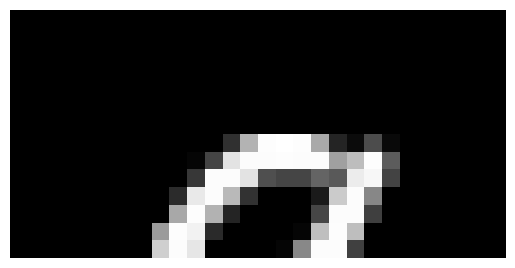

In [28]:
#Set Image to evaluate
idx = 12

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

In [29]:
#load data for half output images
outputs = ["output_partitionPipelines"]
f = open(outputs[0] + '.txt')
content = f.readlines()[1:]
f.close()

data_sw = []
data_hw = []

for s in content:
  t = s.split(';')
  data_sw.append(float(t[0]))
  data_hw.append(float((t[1].split('\n'))[0]))
  
data_sw = np.asarray(data_sw)
data_hw = np.asarray(data_hw)


In [30]:
def image_combiner(cut, generated):
  full_image = np.concatenate((cut,generated))
  return full_image

(-0.5, 27.5, 27.5, -0.5)

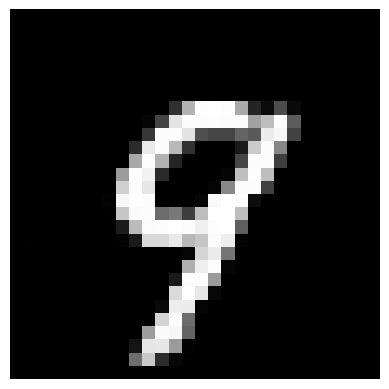

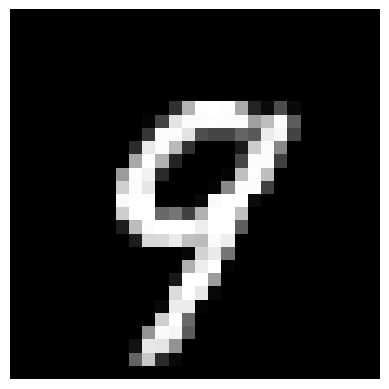

In [31]:
offset = 14*28    # offset for pixels of half image, do not change

# combined image for software output
output_sw = image_combiner(data[idx,:].reshape(14,28), data_sw[idx*offset:idx*offset+offset].reshape(14,28))

# combined image for hardware output
output_hw = image_combiner(data[idx,:].reshape(14,28), data_hw[idx*offset:idx*offset+offset].reshape(14,28))

plt.figure()
plt.imshow(output_sw.reshape((28,28)).astype(np.float32), cmap = 'gray')
plt.axis('off')

plt.figure()
plt.imshow(output_hw.reshape((28,28)).astype(np.float32), cmap = 'gray')
plt.axis('off')

In [32]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [33]:
import math

def psnr(img_data1, img_data2):
    mse = np.mean( (img_data1 - img_data2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def max_error (img_data1, img_data2):
    return np.max(abs(img_data1-img_data2))

In [34]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  13
Peak Signal-to-Noise Ratio:  47.065287020211215
